In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Downloads/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 186.5+ KB


In [6]:
#normalization
df['selling_price'] = df['selling_price'] /df['selling_price'] .max() 
df['km_driven'] = df['km_driven'] /df['km_driven'] .max() 

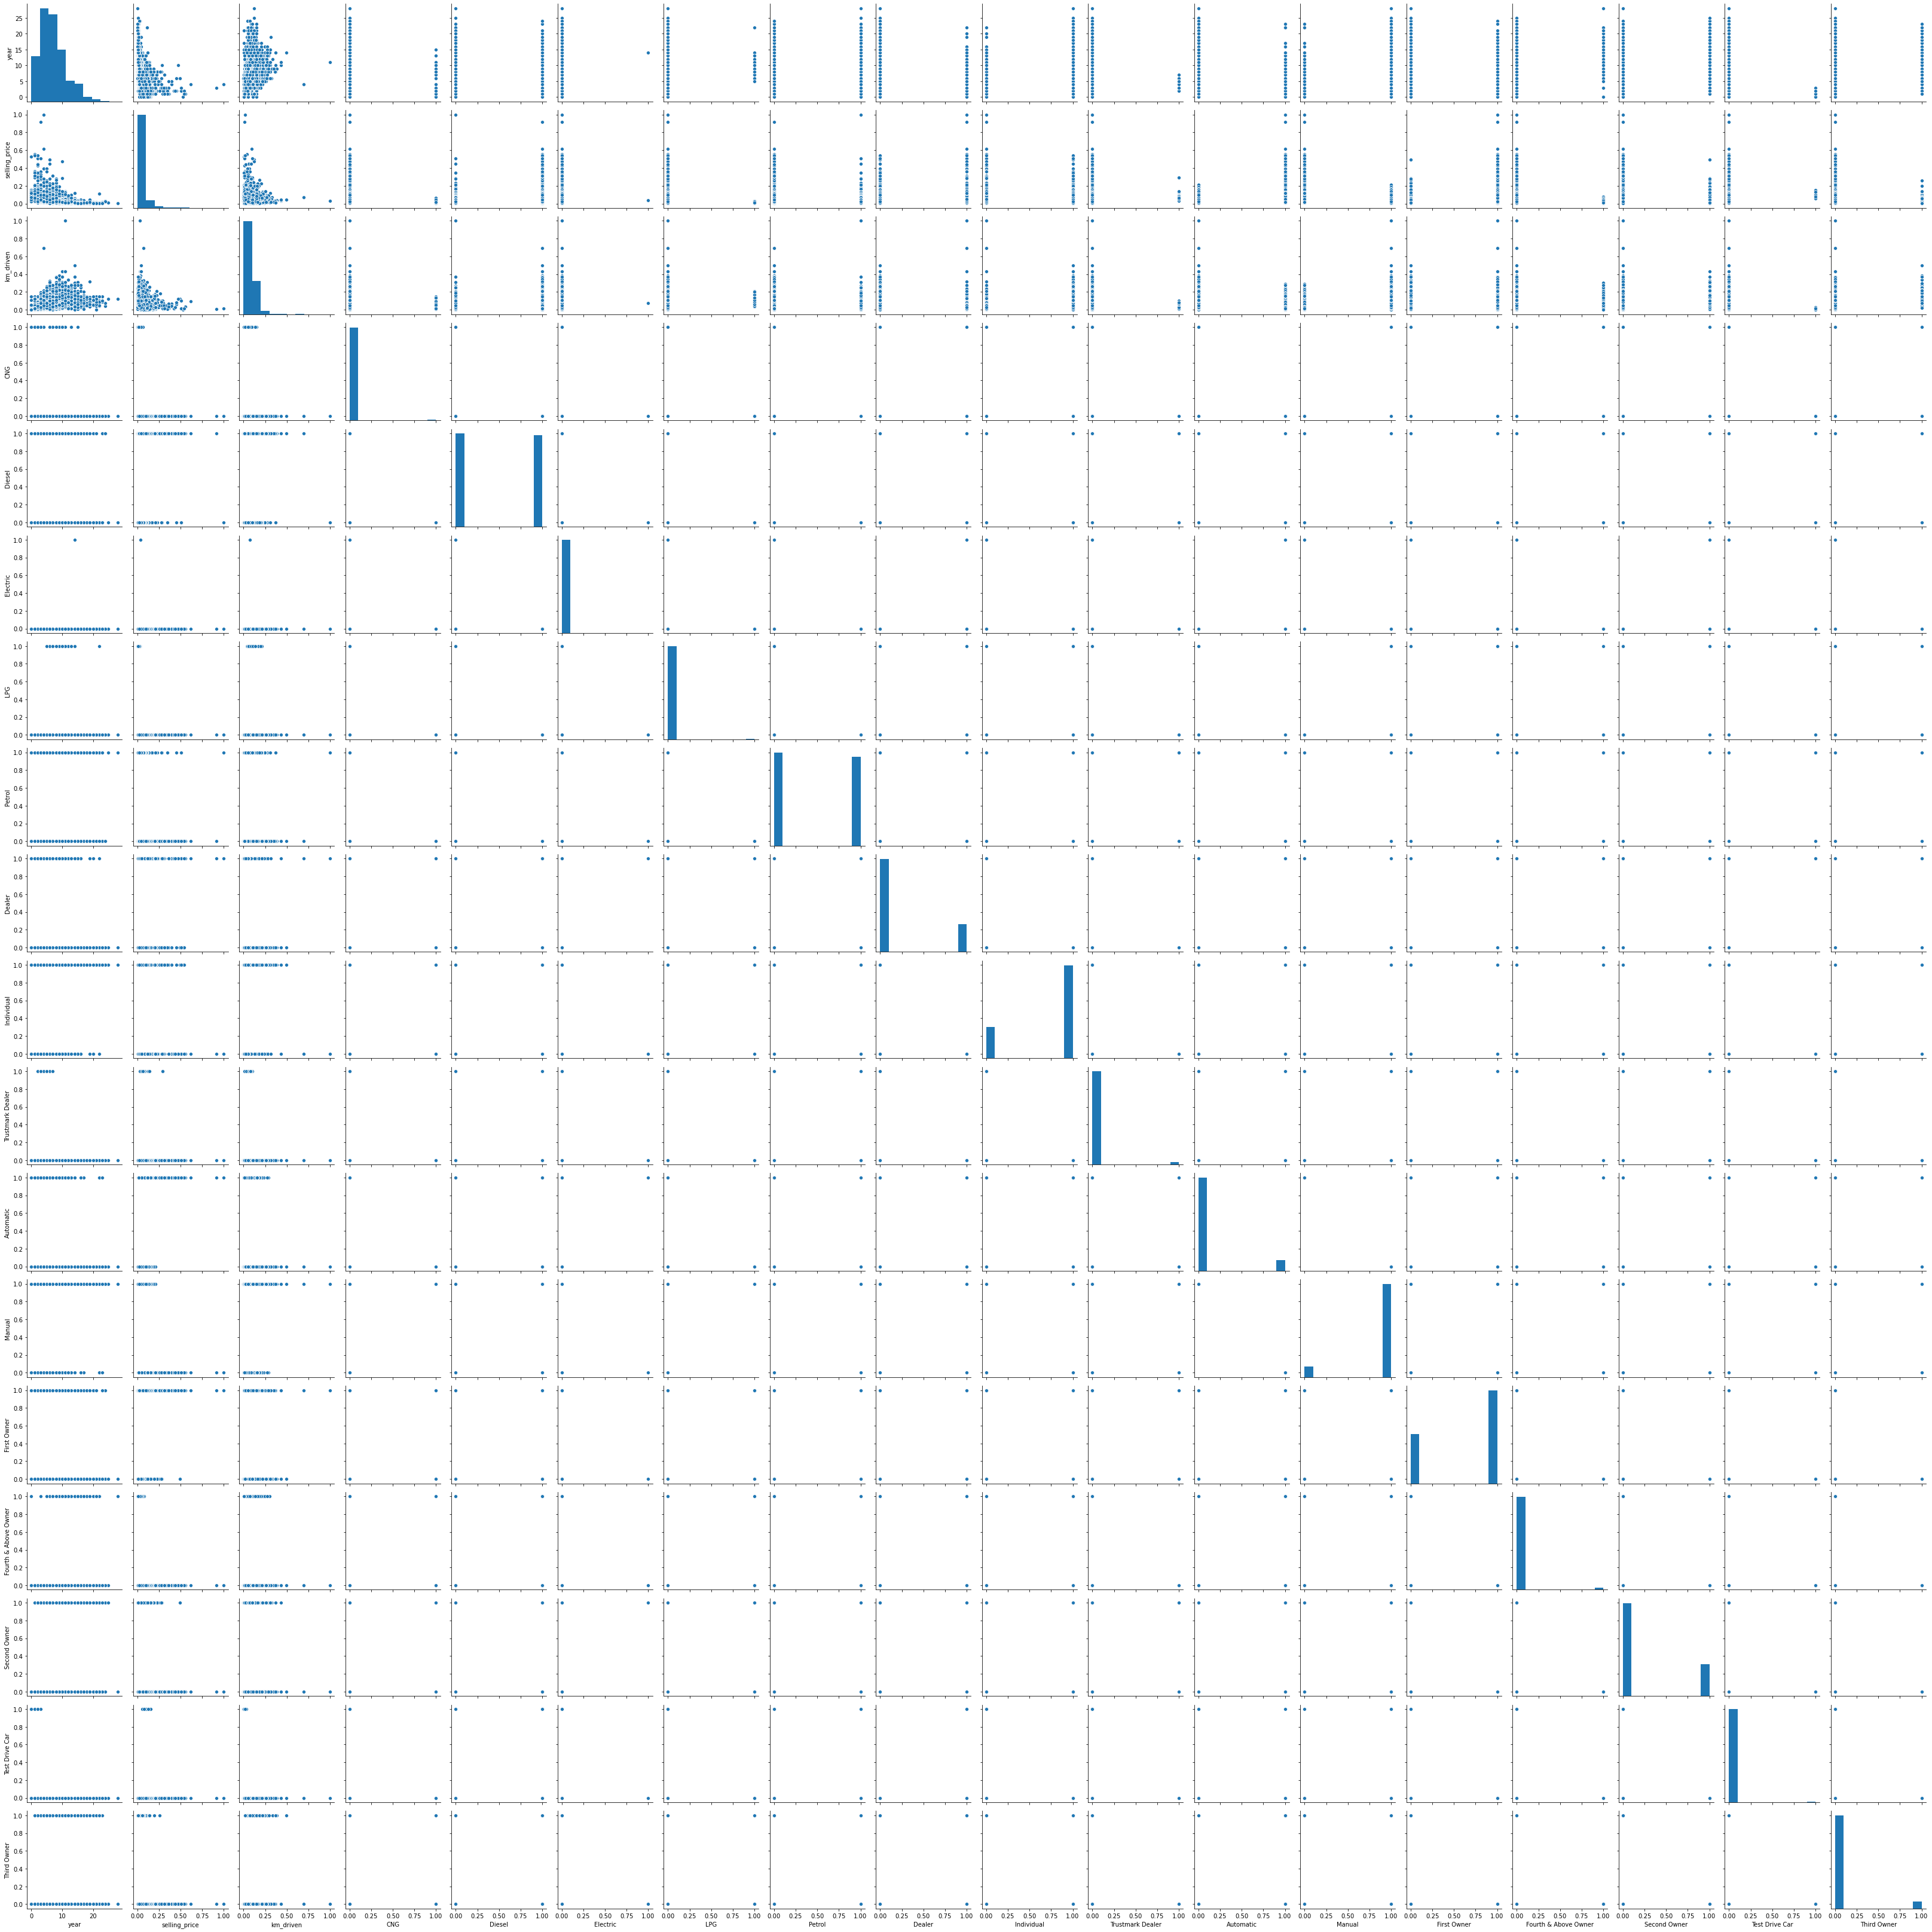

In [48]:
sns.pairplot(df)
plt.tight_layout()

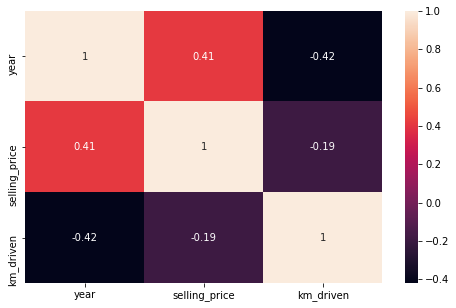

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

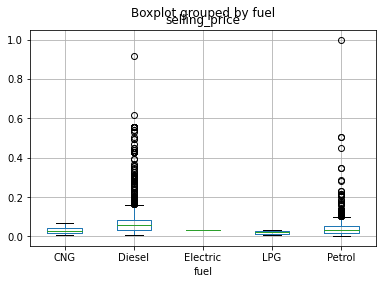

In [9]:
#finding correlation between fuel type and selling price using anova

df.boxplot('selling_price',by='fuel')

In [10]:
mod=ols('selling_price~fuel',data=df).fit()
anov_table=sm.stats.anova_lm(mod,typ=2)
anov_table

,sum_sq,df,F,PR(>F)
fuel,1.479066,4.0,95.094279,1.180719e-77
Residual,16.856298,4335.0,NaN,NaN


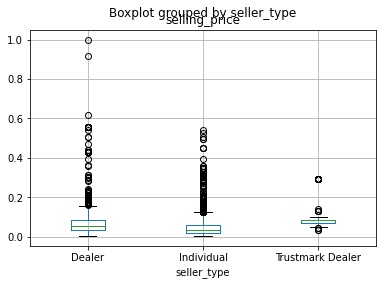

In [11]:
#finding correlation between seller type and selling price using anova

df.boxplot('selling_price',by='seller_type')

In [12]:
mod=ols('selling_price~seller_type',data=df).fit()
anov_table=sm.stats.anova_lm(mod,typ=2)
anov_table

,sum_sq,df,F,PR(>F)
seller_type,1.071683,2.0,134.614625,1.907388e-57
Residual,17.263681,4337.0,NaN,NaN


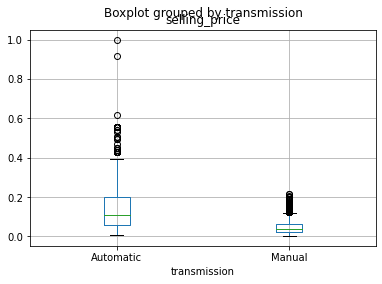

In [13]:
#finding correlation between transmission and selling price using anova

df.boxplot('selling_price',by='transmission')

In [14]:
mod=ols('selling_price~transmission',data=df).fit()
anov_table=sm.stats.anova_lm(mod,typ=2)
anov_table

,sum_sq,df,F,PR(>F)
transmission,5.154391,1.0,1696.365756,2.815748e-313
Residual,13.180972,4338.0,NaN,NaN


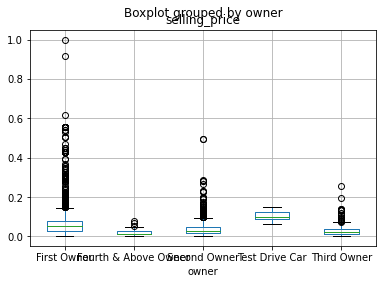

In [15]:
#finding correlation between owner and selling price using anova

df.boxplot('selling_price',by='owner')

In [16]:
mod=ols('selling_price~owner',data=df).fit()
anov_table=sm.stats.anova_lm(mod,typ=2)
anov_table

,sum_sq,df,F,PR(>F)
owner,1.044184,4.0,65.445787,7.938684e-54
Residual,17.291180,4335.0,NaN,NaN


In [17]:
#finding correlation between car name and selling price using anova

mod=ols('selling_price~name',data=df).fit()
anov_table=sm.stats.anova_lm(mod,typ=2)
anov_table


,sum_sq,df,F,PR(>F)
name,17.851149,1490.0,70.491131,0.0
Residual,0.484215,2849.0,NaN,NaN


In [18]:
dummy_fuel=pd.get_dummies(df['fuel'])
df=pd.concat([df,dummy_fuel],axis=1)
df.to_csv('Downloads/CAR DETAILS FROM CAR DEKHO.csv')

In [19]:
dummy_seller_type=pd.get_dummies(df['seller_type'])
df=pd.concat([df,dummy_seller_type],axis=1)
df.to_csv('Downloads/CAR DETAILS FROM CAR DEKHO.csv')

In [20]:
dummy_transmission=pd.get_dummies(df['transmission'])
df=pd.concat([df,dummy_transmission],axis=1)
df.to_csv('Downloads/CAR DETAILS FROM CAR DEKHO.csv')

In [21]:
dummy_owner=pd.get_dummies(df['owner'])
df=pd.concat([df,dummy_owner],axis=1)
df.to_csv('Downloads/CAR DETAILS FROM CAR DEKHO.csv')

In [35]:
#changing the year to continuous variable
df['year']=2020-df['year'] #number of years against 2020
print(df['year'])

0       13
1       13
2        8
3        3
4        6
        ..
4335     6
4336     6
4337    11
4338     4
4339     4
Name: year, Length: 4340, dtype: int64


In [36]:
final=df.drop(['name','fuel','seller_type','transmission','owner','Petrol','Individual','Manual','First Owner','km_driven'],axis='columns')
final


,year,selling_price,CNG,Diesel,Electric,LPG,Dealer,Trustmark Dealer,Automatic,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,13,0.006742,0,0,0,0,0,0,0,0,0,0,0
1,13,0.015169,0,0,0,0,0,0,0,0,0,0,0
2,8,0.067416,0,1,0,0,0,0,0,0,0,0,0
3,3,0.028090,0,0,0,0,0,0,0,0,0,0,0
4,6,0.050562,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,6,0.046067,0,1,0,0,0,0,0,0,1,0,0
4336,6,0.046067,0,1,0,0,0,0,0,0,1,0,0
4337,11,0.012360,0,0,0,0,0,0,0,0,1,0,0
4338,4,0.097191,0,1,0,0,0,0,0,0,0,0,0


In [37]:
lm=LinearRegression()

In [38]:
X=final.drop('selling_price',axis='columns')
X

,year,CNG,Diesel,Electric,LPG,Dealer,Trustmark Dealer,Automatic,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,13,0,0,0,0,0,0,0,0,0,0,0
1,13,0,0,0,0,0,0,0,0,0,0,0
2,8,0,1,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0
4,6,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,6,0,1,0,0,0,0,0,0,1,0,0
4336,6,0,1,0,0,0,0,0,0,1,0,0
4337,11,0,0,0,0,0,0,0,0,1,0,0
4338,4,0,1,0,0,0,0,0,0,0,0,0


In [39]:
Y=final.selling_price
Y

0       0.006742
1       0.015169
2       0.067416
3       0.028090
4       0.050562
          ...   
4335    0.046067
4336    0.046067
4337    0.012360
4338    0.097191
4339    0.025281
Name: selling_price, Length: 4340, dtype: float64

In [40]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [41]:
lm.fit(X_train,Y_train)
yhat = lm.predict(X_test)

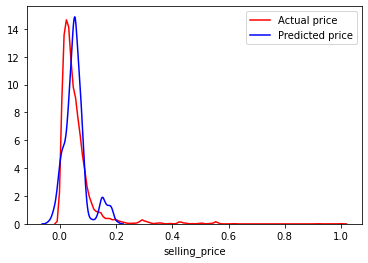

In [42]:
actual_prices = sns.distplot(df['selling_price'], hist = False, color='r', label='Actual price')
sns.distplot(yhat, hist=False, color='b', label='Predicted price', ax=actual_prices)

In [43]:
lm.coef_

array([-0.00424661, -0.00038084,  0.02960294, -0.06564928,  0.00412591,
        0.00800821,  0.03031695,  0.09697706, -0.00141016, -0.00502109,
        0.02460542, -0.00763334])

In [44]:
lm.intercept_

0.059969075150183695

In [45]:
from sklearn.metrics import mean_squared_error

#finding mse
mse=mean_squared_error(Y_test,yhat)

In [46]:
import math 
print('Root mean squared error:',math.sqrt(mse))

Root mean squared error: 0.04690329209691308


In [47]:
lm.score(X_train, Y_train)

0.44559445207227155